# Classification and Regression Trees (CART)

<img src='Decision Tree.png' width='250' align='center'></img>



## Table of Contents

## Introductions<a id='introduction'></a>

## Import Libraries<a id='libraries'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_style('whitegrid')
sb.despine(offset=10, trim=True);

<Figure size 640x480 with 0 Axes>

## Load Sample Data<a id='sampledata'>

In [2]:
x1 = [2.771244718, 1.728571309, 3.678319846, 3.961043357, 2.999208922, 7.497545867, 9.00220326, 7.444542326, 10.12493903, 
      6.642287351]
x2 = [1.784783929, 1.169761413, 2.81281357, 2.61995032, 2.209014212, 3.162953546, 3.339047188, 0.476683375, 3.234550982, 
      3.319983761]
y = [0, 0, 0, 0,0, 1, 1, 1, 1, 1]

df = pd.DataFrame(columns=['x1', 'x2', 'y'])
df['x1'] = x1
df['x2'] = x2
df['y'] = y

df

,x1,x2,y
0,2.771245,1.784784,0
1,1.728571,1.169761,0
2,3.678320,2.812814,0
3,3.961043,2.619950,0
4,2.999209,2.209014,0
5,7.497546,3.162954,1
6,9.002203,3.339047,1
7,7.444542,0.476683,1
8,10.124939,3.234551,1
9,6.642287,3.319984,1


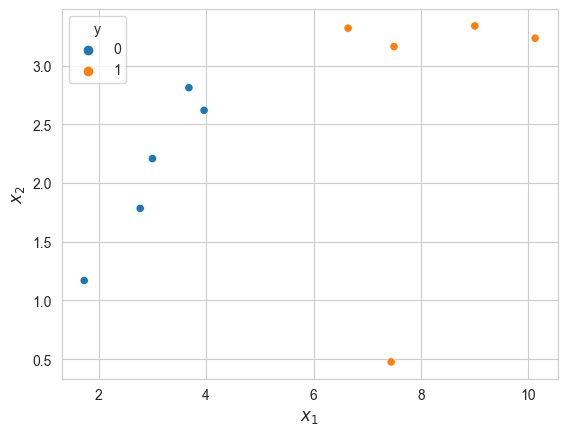

In [3]:
sb.scatterplot(data=df, x='x1', y='x2', hue='y')
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.show()

## Manual Implementation of CART<a id='manual'></a>

The CART model is learned by looking for split points in the data. A split point is a single value of a single attribute. Partitioning data at a split point involves separating all data at that node into two groups, left of the split point and right of the split point.

### Gini Index Cost Function
$$G = \sum\limits_{k=1}^{n}p_k \times (1-p_k)$$

Where $G$ is the Gini index over all classes, $p_k$ are the proportion of training instances with class $k$.

In [4]:
# In our study we'll use the first value of x1 as a first split point
split1 = df.loc[0, 'x1']

In [11]:
def update_df(split):
    df['Group'] = ''
    df.loc[df['x1'] < split, 'Group'] = 'LEFT'
    df.loc[df['x1'] >= split, 'Group'] = 'RIGHT'
    
    # print the udpated dataframe to the screen
    print(df)

In [10]:
def calculate_gini():
    # Calculate class counts
    left_0 = len(df[(df['Group'] == 'LEFT') & (df['y'] == 0)])
    left_1 = len(df[(df['Group'] == 'LEFT') & (df['y'] == 1)])

    right_0 = len(df[(df['Group'] == 'RIGHT') & (df['y'] == 0)])
    right_1 = len(df[(df['Group'] == 'RIGHT') & (df['y'] == 1)])

    right = right_0 + right_1
    left = left_0 + left_1
    
    # print the counts to the screen
    print(pd.pivot_table(data=df.drop('x2', axis=1), index='y', columns='Group', aggfunc='count', 
               margins=True, margins_name='Sum', fill_value=0))
    
    # Calculate Gini Index
    g_left_0 = left_0 / left
    print('Left 0: ', g_left_0)
    g_left_1 = left_1 / left
    print('Left 1: ', g_left_1)

    g_right_0 = right_0 / right
    print('Right 0: ', g_right_0)
    g_right_1 = right_1 / right
    print('Right 1: ', g_right_1)

    ## Calculating weights
    w_left = left / (left + right)
    print('Weight Left: ', w_left)
    w_right = right / (left + right)
    print('Weight Right: ', w_right)

    g_left = (1 - (np.square(g_left_0) + np.square(g_left_1))) * w_left
    print('\nGini LEFT: ', g_left)
    g_right = (1 - (np.square(g_right_0) + np.square(g_right_1))) * w_right
    print('Gini RIGHT: ', g_right)
    gini = g_left + g_right
    print('\n---------------------------')
    print('Gini: ', gini)

In [12]:
update_df(split1)

          x1        x2  y  Group
0   2.771245  1.784784  0  RIGHT
1   1.728571  1.169761  0   LEFT
2   3.678320  2.812814  0  RIGHT
3   3.961043  2.619950  0  RIGHT
4   2.999209  2.209014  0  RIGHT
5   7.497546  3.162954  1  RIGHT
6   9.002203  3.339047  1  RIGHT
7   7.444542  0.476683  1  RIGHT
8  10.124939  3.234551  1  RIGHT
9   6.642287  3.319984  1  RIGHT


In [13]:
calculate_gini()

        x1          
Group LEFT RIGHT Sum
y                   
0        1     4   5
1        0     5   5
Sum      1     9  10
Left 0:  1.0
Left 1:  0.0
Right 0:  0.4444444444444444
Right 1:  0.5555555555555556
Weight Left:  0.1
Weight Right:  0.9

Gini LEFT:  0.0
Gini RIGHT:  0.4444444444444444

---------------------------
Gini:  0.4444444444444444


In [19]:
split2 = df['x1'].iloc[-1]

In [20]:
update_df(split2)

          x1        x2  y  Group
0   2.771245  1.784784  0   LEFT
1   1.728571  1.169761  0   LEFT
2   3.678320  2.812814  0   LEFT
3   3.961043  2.619950  0   LEFT
4   2.999209  2.209014  0   LEFT
5   7.497546  3.162954  1  RIGHT
6   9.002203  3.339047  1  RIGHT
7   7.444542  0.476683  1  RIGHT
8  10.124939  3.234551  1  RIGHT
9   6.642287  3.319984  1  RIGHT


In [21]:
calculate_gini()

        x1          
Group LEFT RIGHT Sum
y                   
0        5     0   5
1        0     5   5
Sum      5     5  10
Left 0:  1.0
Left 1:  0.0
Right 0:  0.0
Right 1:  1.0
Weight Left:  0.5
Weight Right:  0.5

Gini LEFT:  0.0
Gini RIGHT:  0.0

---------------------------
Gini:  0.0
